<a href="https://colab.research.google.com/github/YoishD/Data-Science-B7/blob/main/Copy_of_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

In [ ]:
!pip install git+https://github.com/pydata/xarray.git
import xarray as xr
!pip install bambi
import bambi as bmb
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-hp6m1ruk
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-hp6m1ruk
  Resolved https://github.com/pydata/xarray.git to commit 2c8b6e6942e537b24cc09adc5204d6100d2843aa
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.2.dev2+g2c8b6e69-py3-none-any.whl size=1241889 sha256=da940242158fbec83ae1d185ecdb7168ce3952bcbe8ac563ca1812c3ec3d87fb
  Stored in directory: /tmp/pip-ephem-wheel-cache-te6a600e/wheels/3a/ec/c0/1cda725917279b6beba2a020d6ccddfee2176b25648f4fcad8
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2024.11.0
    Uninstalling xarray-2024.11.0:
      Successfully uninstalled xarray-2024.11.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.7 MB/s eta 0:00:00
  

**Task1**:

Does elpd_loo mean anything if we only have one model?

No Elpd_loo is based on comparason between two models

**Task2**:

Describe overfitting, in the context of this course

- selecting a model with the smallest number of variables ensures we are doing our best to avoid overfitting, or letting our model get distriacted by unneccesary information.


**Task3**:

How do we mitigate overfitting?

Priors, additonally elpd_loo helps pick a model that doesn't underfit too much

**Task4**:

How do we mitigate underfitting?

Selecting a model based on elpd_loo ensures we are doing our best to account for underfitting, or trying our best to be accurate.


**Task5**:

Why would we want more than one predictor in a model?

Having multiple predictors serve to better inform the model and thus lessen our assumptions, allowing our model to be more accurate.

**Task6**:

Can we have too many predictors? How would we now?

We definetly can have to many predictors and we can use elpd_loo and compare two models between each other to help visualize which model has the better number of predictors

**Task7**:

What is variable selection, and how does it work?

Variable selection is the process of figuring out the variables we need to add if any to become multiple predictors. In order to accomplish this you could run multipled different models favoring different variables and then comparing the results in order to better visualize the effects of the variables.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

Heirarchy - Nothing to drastic from standard, just that the slope will be different for all the categorical variables
Interaction - Again nothing to drastic, however it is more alike a heirarchical model than the standard as each cat. variable is sloped differently. (Note: It also seems to be more accuratley based off the HDI of the graph of the interaction model in the notes, but I'm unsure if this specific interaction is due to the change in model or just a function of the data itself)
Standard - Causes all the different cat. variables to all have the same slope. Other than that it is pretty much the same.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

:You can use "bmb.interpret.plot_predictions" to visualize. Yes.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [ ]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [ ]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

<ipython-input-3-bb9f7b7913fd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)


Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

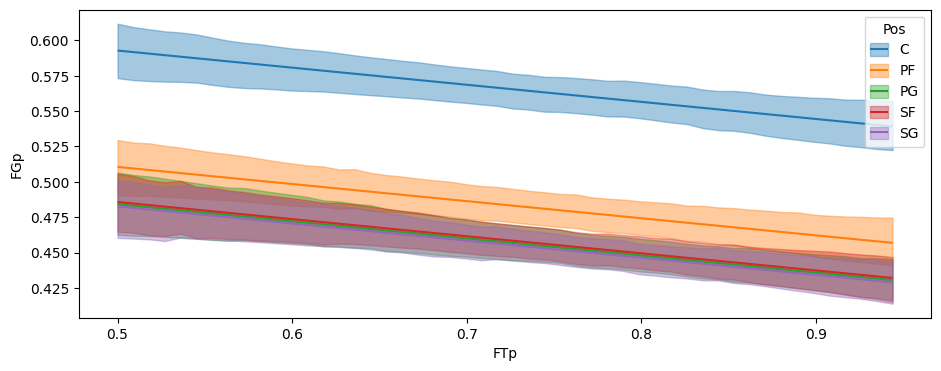

In [ ]:
#Model 1
#define the model
model_basketball = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb)
#fit the model
idata_basketball = model_basketball.fit(idata_kwargs={'log_likelihood': True})
bmb.interpret.plot_predictions(model_basketball,
                               idata_basketball,
                                ["FTp",  "Pos"], fig_kwargs={"figsize":(11, 4)})

Output()

Output()

ERROR:pymc.stats.convergence:There were 14 divergences after tuning. Increase `target_accept` or reparameterize.
/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

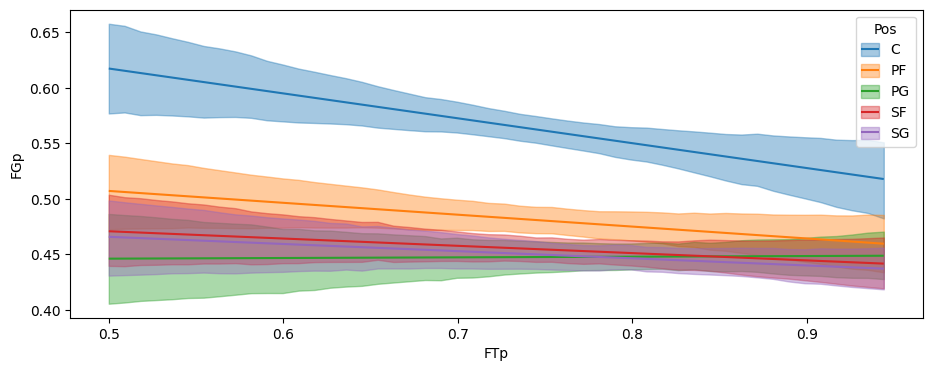

In [ ]:
#Model 2
#define the model, but as a hierarchy
model_basketball_h = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb)
#create the model
idata_basketball_h = model_basketball_h.fit(idata_kwargs={'log_likelihood': True})

bmb.interpret.plot_predictions(model_basketball_h,
                               idata_basketball_h,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

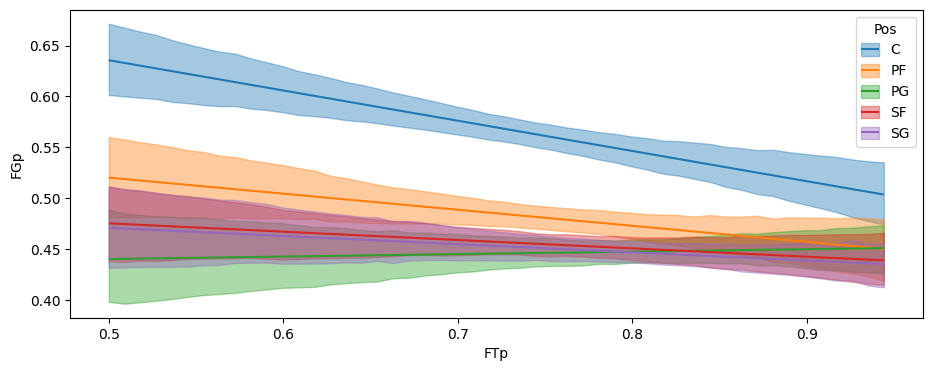

In [ ]:
#Model 3
model_bb_inter = bmb.Model("`FGp` ~ `FTp` + Pos + `FTp`:Pos", data=bb)
#create the model
idata_bb_inter = model_bb_inter.fit(idata_kwargs={'log_likelihood': True})
bmb.interpret.plot_predictions(model_bb_inter,
                               idata_bb_inter,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

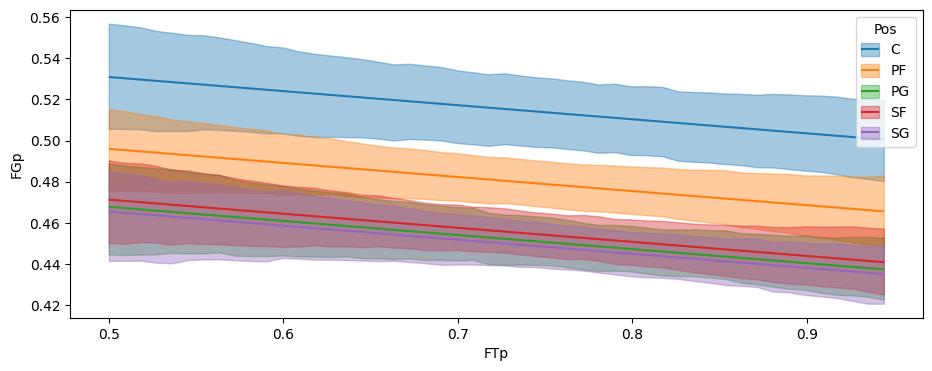

In [ ]:
#Model 5
model_bb_3pos_inter = bmb.Model("`FGp` ~ FTp + Pos + '3PA' +`3PA`:Pos", data=bb)
idata_bb_3pos_inter = model_bb_3pos_inter.fit(idata_kwargs={'log_likelihood': True})
bmb.interpret.plot_predictions(model_bb_3pos_inter,
                               idata_bb_3pos_inter,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

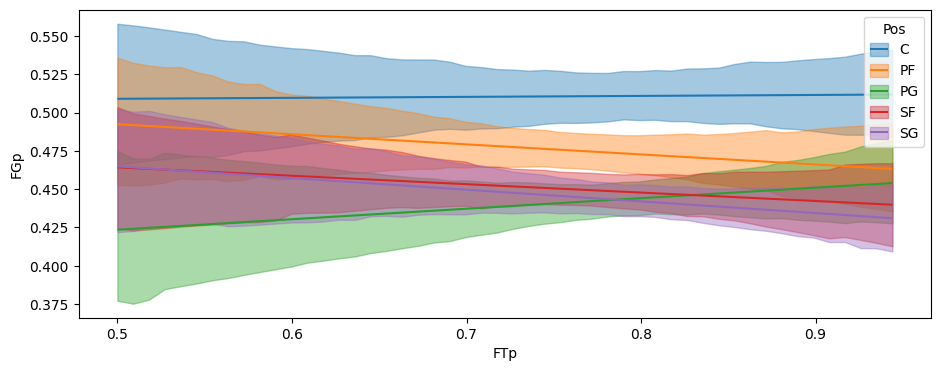

In [ ]:
#Model 4
model_bb_3posFTp_inter = bmb.Model("`FGp` ~ 'FTp' + '3PA' + Pos + 'FTp':Pos + '3PA':Pos +'FTp':'3PA'" , data=bb)
idata_bb_3posFTp_inter = model_bb_3posFTp_inter.fit(idata_kwargs={'log_likelihood': True})
bmb.interpret.plot_predictions(model_bb_3posFTp_inter,
                               idata_bb_3posFTp_inter,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

In [ ]:
cmp_df = az.compare({"model1":idata_basketball,"model2":idata_basketball_h, "model3":idata_bb_inter,"model4":idata_bb_3posFTp_inter,"model5":idata_bb_3pos_inter})
cmp_df


/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
model5,0,529.710335,12.829526,0.000000,5.587068e-01,15.825724,0.000000,False,log
model4,1,528.993523,19.210064,0.716812,4.412932e-01,15.041903,3.703175,True,log
model3,2,509.287136,13.934665,20.423199,4.336260e-15,16.698680,7.666748,False,log
model2,3,508.339502,13.715336,21.370833,2.876550e-15,17.004587,7.153894,True,log
model1,4,507.334927,8.274757,22.375408,0.000000e+00,16.164565,6.901156,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

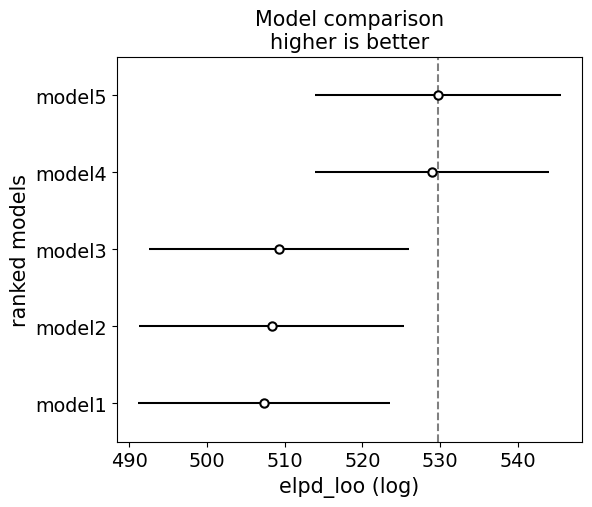

In [ ]:
az.plot_compare(cmp_df)

Based off of elpd_loo, either 4 or five would work as elpd_loo just tells us if our models are significantly different, which both models are from the others. I will also say that actually all models would work for predictive purposes as they all overlap